In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
from pandasql import sqldf

Import and tidying data

In [2]:
# load and convert json data to pandas dataframe
url = 'https://raw.githubusercontent.com/nyphilarchive/PerformanceHistory/main/Programs/json/complete.json'
resp = requests.get(url)
dat = json.loads(resp.text)
nycphil = pd.json_normalize(dat['programs'])
nycphil.head(3)

,id,programID,orchestra,season,concerts,works
0,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,3853,New York Philharmonic,1842-43,"[{'eventType': 'Subscription Season', 'Locatio...","[{'ID': '52446*', 'composerName': 'Beethoven, ..."
1,1118e84e-eb59-46cc-9119-d903375e65e6-0.1,5178,New York Philharmonic,1842-43,"[{'eventType': 'Subscription Season', 'Locatio...","[{'ID': '52437*', 'composerName': 'Beethoven, ..."
2,08536612-27c3-437e-9b44-def21034b06c-0.1,10785,Musicians from the New York Philharmonic,1842-43,"[{'eventType': 'Special', 'Location': 'Manhatt...","[{'ID': '52364*1', 'composerName': 'Beethoven,..."


In [3]:
# flatten nested concerts and works data
concerts_dat = pd.json_normalize(dat['programs'], record_path='concerts', 
                              meta=['id', 'orchestra', 'programID', 'season'])
works_dat = pd.json_normalize(data=dat['programs'], record_path='works', 
                               meta=['id', 'orchestra','programID', 'season'])

In [198]:
# Join nested data
nycphil_full = concerts_dat.merge(works_dat, how = "inner", on = ['id', 'orchestra', 'programID','season'])
nycphil_full.head()

,eventType,Location,Venue,Date,Time,id,orchestra,programID,season,ID,composerName,workTitle,conductorName,soloists,movement,interval,movement._,movement.em,workTitle._,workTitle.em
0,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,52446*,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67","Hill, Ureli Corelli",[],NaN,NaN,NaN,NaN,NaN,NaN
1,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,8834*4,"Weber, Carl Maria Von",OBERON,"Timm, Henry C.","[{'soloistName': 'Otto, Antoinette', 'soloistI...","""Ozean, du Ungeheuer"" (Ocean, thou mighty mons...",NaN,NaN,NaN,NaN,NaN
2,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,3642*,"Hummel, Johann","QUINTET, PIANO, D MINOR, OP. 74",NaN,"[{'soloistName': 'Scharfenberg, William', 'sol...",NaN,NaN,NaN,NaN,NaN,NaN
3,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,0*,NaN,NaN,NaN,[],NaN,Intermission,NaN,NaN,NaN,NaN
4,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,8834*3,"Weber, Carl Maria Von",OBERON,"Etienne, Denis G.",[],Overture,NaN,NaN,NaN,NaN,NaN


Exploratory Data Analysis

In [199]:
nycphil_full.shape

(125224, 20)

In [200]:
nycphil_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125224 entries, 0 to 125223
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   eventType      125224 non-null  object
 1   Location       125224 non-null  object
 2   Venue          125224 non-null  object
 3   Date           125224 non-null  object
 4   Time           125224 non-null  object
 5   id             125224 non-null  object
 6   orchestra      125224 non-null  object
 7   programID      125224 non-null  object
 8   season         125224 non-null  object
 9   ID             125224 non-null  object
 10  composerName   106735 non-null  object
 11  workTitle      106723 non-null  object
 12  conductorName  99351 non-null   object
 13  soloists       125224 non-null  object
 14  movement       35160 non-null   object
 15  interval       18489 non-null   object
 16  movement._     148 non-null     object
 17  movement.em    334 non-null     object
 18  work

In [201]:
nycphil_full.head()

,eventType,Location,Venue,Date,Time,id,orchestra,programID,season,ID,composerName,workTitle,conductorName,soloists,movement,interval,movement._,movement.em,workTitle._,workTitle.em
0,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,52446*,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67","Hill, Ureli Corelli",[],NaN,NaN,NaN,NaN,NaN,NaN
1,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,8834*4,"Weber, Carl Maria Von",OBERON,"Timm, Henry C.","[{'soloistName': 'Otto, Antoinette', 'soloistI...","""Ozean, du Ungeheuer"" (Ocean, thou mighty mons...",NaN,NaN,NaN,NaN,NaN
2,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,3642*,"Hummel, Johann","QUINTET, PIANO, D MINOR, OP. 74",NaN,"[{'soloistName': 'Scharfenberg, William', 'sol...",NaN,NaN,NaN,NaN,NaN,NaN
3,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,0*,NaN,NaN,NaN,[],NaN,Intermission,NaN,NaN,NaN,NaN
4,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00Z,8:00PM,00646b9f-fec7-4ffb-9fb1-faae410bd9dc-0.1,New York Philharmonic,3853,1842-43,8834*3,"Weber, Carl Maria Von",OBERON,"Etienne, Denis G.",[],Overture,NaN,NaN,NaN,NaN,NaN


In [202]:
nycphil_full.isnull().sum()

eventType             0
Location              0
Venue                 0
Date                  0
Time                  0
id                    0
orchestra             0
programID             0
season                0
ID                    0
composerName      18489
workTitle         18501
conductorName     25873
soloists              0
movement          90064
interval         106735
movement._       125076
movement.em      124890
workTitle._      125212
workTitle.em     125212
dtype: int64

Looking at datatypes and missing values, there are a few things to be fixed. 
Date should be converted to a datetime datatype. The documentation indicates that the time value in the Date column is not accurate, so I will take that out of the values. 
There are also missing values starting at the composerName column and on. I will drop columns that are not going to be used in this analysis.

In [203]:
# Convert to date formats
nycphil_full['Date'] = pd.to_datetime(nycphil_full['Date'],infer_datetime_format=True)
#nycphil_full['Date'] = nycphil_full['Date'].dt.date
nycphil_full['year'] = nycphil_full['Date'].dt.year
nycphil_full['month'] = nycphil_full['Date'].dt.month

In [204]:
# Drop irrelevant columns
nycphil_full = nycphil_full.drop(['soloists', 'interval', 'movement._', 'movement.em', 'workTitle._', 'workTitle.em', 'ID'], axis = 1)

In [205]:
nycphil_full['composerName'].nunique()

3017

In [206]:
nycphil_full['programID'].nunique()

14502

Exploratory Data Analysis

Events

<AxesSubplot:title={'center':'Programs by year'}, xlabel='year'>

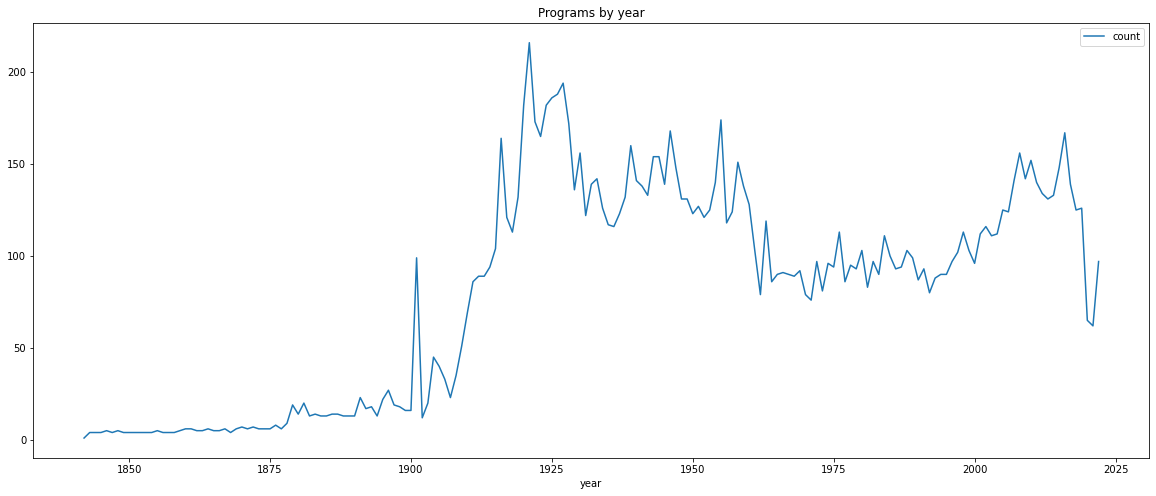

In [223]:
nprograms = sqldf("SELECT COUNT(DISTINCT programid) count, year FROM nycphil_full GROUP BY year")
nprograms = nprograms.drop([181]) #drop 2023 
nprograms.plot(x = 'year',  figsize=[20,8], title = 'Programs by year')

Interesting to see here how the number of events suffered due to the pandemic and have not seemed to rebound quite as much.

<AxesSubplot:title={'center':'Top 15 event types'}, ylabel='eventType'>

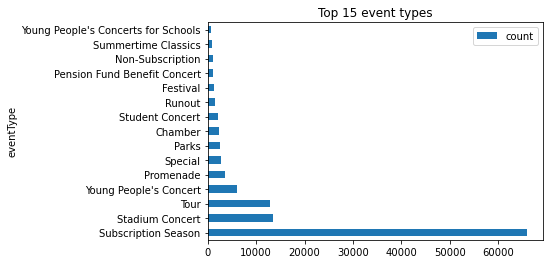

In [228]:
allevents = sqldf("SELECT COUNT(*) count, eventType FROM nycphil_full GROUP BY eventType ORDER BY count DESC LIMIT 15")
allevents.plot(kind='barh', x = 'eventType', y = 'count', title = 'Top 15 event types')

<AxesSubplot:title={'center':'Top 15 event types since 2013'}, ylabel='eventType'>

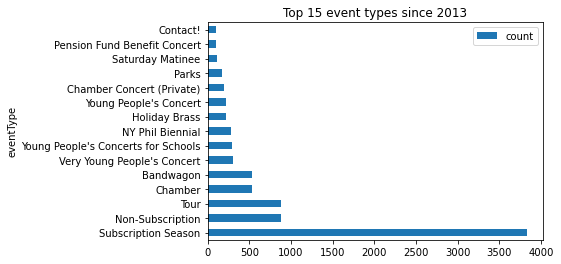

In [229]:
events10 = sqldf("SELECT COUNT(*) count, eventType FROM nycphil_full WHERE year > 2012 GROUP BY eventType ORDER BY count DESC LIMIT 15")
events10.plot(kind='barh', x = 'eventType', y = 'count', title = 'Top 15 event types since 2013')

Composers

<AxesSubplot:title={'center':'Top 15 composers'}, ylabel='composer'>

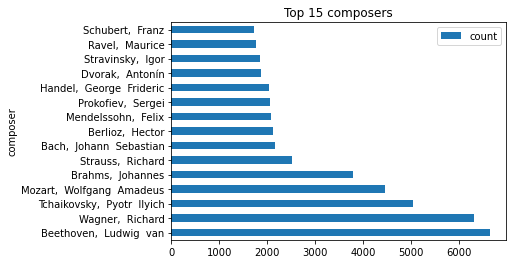

In [208]:
composers = sqldf("SELECT COUNT(*) count, composerName AS composer FROM nycphil_full GROUP BY composerName ORDER BY count DESC LIMIT 16")
composers = composers.drop([0])
composers.plot(kind='barh', x = 'composer', y = 'count', title = 'Top 15 composers')

<AxesSubplot:title={'center':'Top 15 composers in the last 10 years'}, ylabel='composer'>

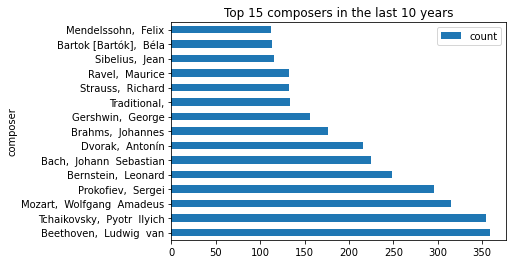

In [211]:
composers_last10 = sqldf("SELECT COUNT(*) count, composerName composer FROM nycphil_full WHERE year > 2012 GROUP BY composerName ORDER BY count DESC LIMIT 16")
composers_last10 = composers_last10.drop([0])
composers_last10.plot(kind='barh', x = 'composer', y = 'count', title = 'Top 15 composers in the last 10 years')

<AxesSubplot:title={'center':'Beethoven by year'}, xlabel='year'>

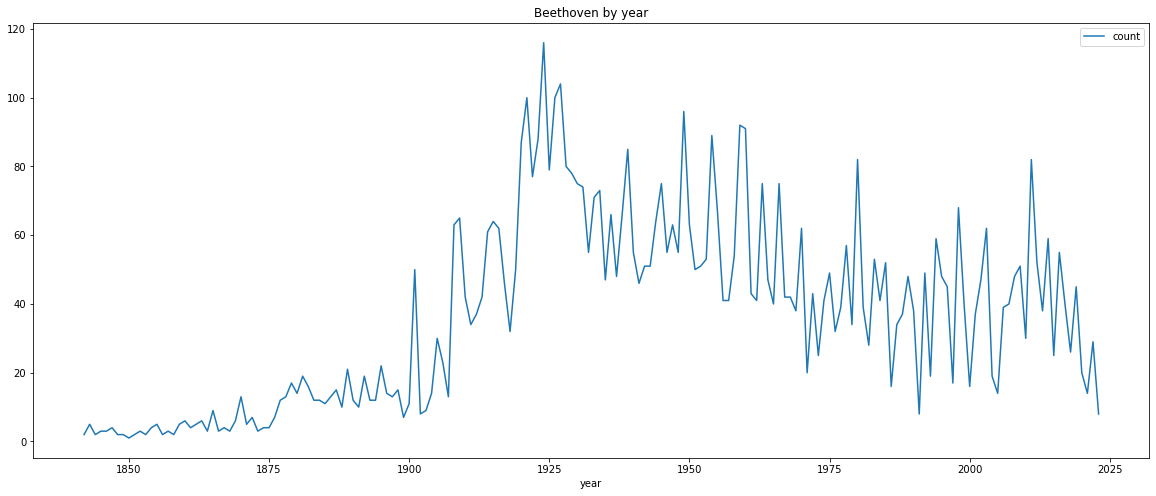

In [212]:
beethoven = sqldf("SELECT COUNT(*) AS count, year, composerName AS composer FROM nycphil_full WHERE composer LIKE 'Beethoven%' GROUP BY composerName, year")
beethoven.plot(x = 'year',  figsize=[20,8], title = 'Beethoven by year')

<AxesSubplot:title={'center':'Wagner by year'}, xlabel='year'>

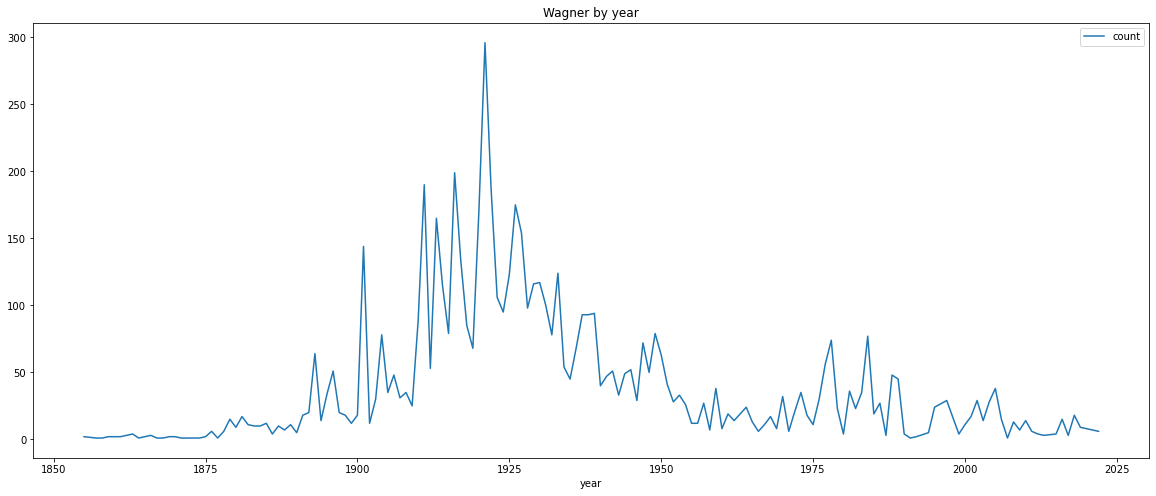

In [210]:
wagner = sqldf("SELECT COUNT(*) AS count, year, composerName AS composer FROM nycphil_full WHERE composer LIKE 'Wagner,  Richard%' GROUP BY composerName, year")
wagner.plot(x = 'year',  figsize=[20,8], title = 'Wagner by year')

Conductors

<AxesSubplot:title={'center':'Top 15 conductors in 2022'}, ylabel='conductor'>

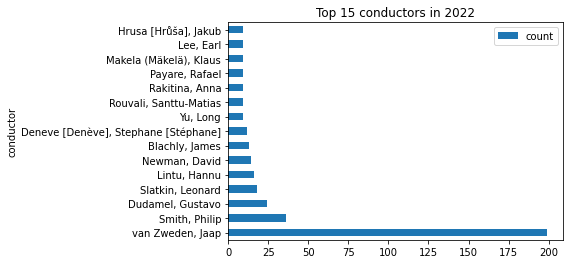

In [231]:
conduct22 = sqldf("SELECT COUNT(*) count, conductorName AS conductor FROM nycphil_full WHERE year = 2022 GROUP BY conductor ORDER BY count DESC LIMIT 16")
conduct22 = conduct22.drop([0])
conduct22.plot(kind='barh', x = 'conductor', y = 'count', title = 'Top 15 conductors in 2022')

There are two women on this list